In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
%cd /Users/cgu3/Documents/conditional-graph-variational-autoencoder
%pwd

/Users/cgu3/Documents/conditional-graph-variational-autoencoder


'/Users/cgu3/Documents/conditional-graph-variational-autoencoder'

In [41]:
# Read the JSON file line by line into a DataFrame
data = []
with open('results/results.json', 'r') as f:
    for line in f:
        data.append(pd.read_json(line, lines=True))

# Concatenate all the dataframes
df = pd.concat(data, ignore_index=True)

# Convert the DataFrame to a CSV file
# df.to_csv('results.csv', index=False)

/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/513552661.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/513552661.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/513552661.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/513552661.py:5: FutureWarning: Passing literal 

In [42]:
df

,dataset,split_ratio,seed,AUC,AP,execution_time
0,Cora,0.1,42,0.9256,0.9345,58.07
1,Cora,0.1,43,0.9651,0.9657,57.52
2,Cora,0.1,44,0.9109,0.9182,58.48
3,Cora,0.1,45,0.9155,0.9145,63.42
4,Cora,0.1,46,0.9008,0.8919,59.46
...,...,...,...,...,...,...
175,CiteSeer,0.9,47,0.9197,0.9273,118.59
176,CiteSeer,0.9,48,0.9010,0.9067,97.63
177,CiteSeer,0.9,49,0.9089,0.9125,103.88
178,CiteSeer,0.9,50,0.9435,0.9476,131.44


In [58]:
# calculate mean and std for auc and ap group by dataset and split_ratio
df_agg = df.groupby(['dataset', 'split_ratio']).agg({'AUC': ['mean', 'std'], 'AP': ['mean', 'std']})
# ungroup the index
df_agg = df_agg.reset_index()

In [84]:
df_agg[df_agg['dataset'] == 'Cora']

dataset split_ratio      AUC                 AP          
                           mean       std     mean       std
9     Cora         0.1  0.93066  0.026215  0.93348  0.026046
10    Cora         0.2  0.92393  0.020322  0.92136  0.024127
11    Cora         0.3  0.93879  0.013738  0.93789  0.014508
12    Cora         0.4  0.93196  0.011277  0.92811  0.012380
13    Cora         0.5  0.92156  0.014187  0.91642  0.021716
14    Cora         0.6  0.94680  0.015115  0.94250  0.020619
15    Cora         0.7  0.93198  0.014945  0.92736  0.016574
16    Cora         0.8  0.91464  0.016179  0.91320  0.019189
17    Cora         0.9  0.89095  0.013339  0.89087  0.014950

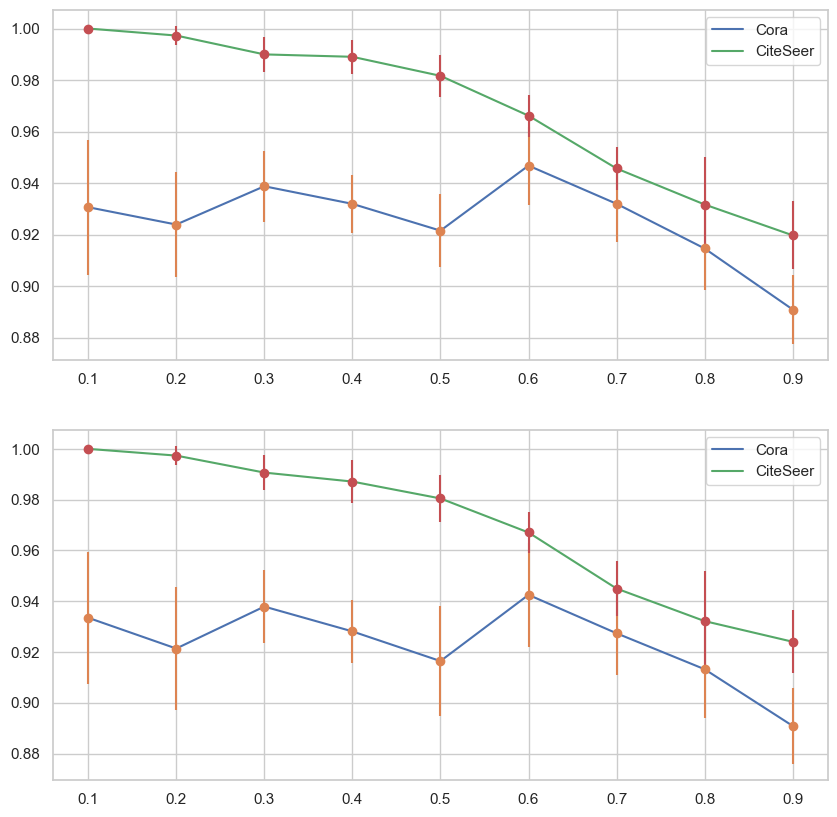

In [82]:
# plot lineplot for AUC and AP for each dataset and split_ratio
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(df_agg[df_agg['dataset'] == 'Cora']['split_ratio'], 
           df_agg[df_agg['dataset'] == 'Cora']['AUC']['mean'], label='Cora')
# add error bar for AUC
ax[0].errorbar(df_agg[df_agg['dataset'] == 'Cora']['split_ratio'], 
               df_agg[df_agg['dataset'] == 'Cora']['AUC']['mean'], 
               yerr=df_agg[df_agg['dataset'] == 'Cora']['AUC']['std'], fmt='o')
# axist 0 plot for CiteSeer
ax[0].plot(df_agg[df_agg['dataset'] == 'CiteSeer']['split_ratio'], 
           df_agg[df_agg['dataset'] == 'CiteSeer']['AUC']['mean'], label='CiteSeer')
# add error bar for AUC
ax[0].errorbar(df_agg[df_agg['dataset'] == 'CiteSeer']['split_ratio'], 
               df_agg[df_agg['dataset'] == 'CiteSeer']['AUC']['mean'], 
               yerr=df_agg[df_agg['dataset'] == 'CiteSeer']['AUC']['std'], fmt='o')
# add legend
ax[0].legend()
# axis 1 plot for AP
ax[1].plot(df_agg[df_agg['dataset'] == 'Cora']['split_ratio'], 
           df_agg[df_agg['dataset'] == 'Cora']['AP']['mean'], label='Cora')
# add error bar for AP
ax[1].errorbar(df_agg[df_agg['dataset'] == 'Cora']['split_ratio'], 
               df_agg[df_agg['dataset'] == 'Cora']['AP']['mean'], 
               yerr=df_agg[df_agg['dataset'] == 'Cora']['AP']['std'], fmt='o')
# axist 1 plot for CiteSeer
ax[1].plot(df_agg[df_agg['dataset'] == 'CiteSeer']['split_ratio'], 
           df_agg[df_agg['dataset'] == 'CiteSeer']['AP']['mean'], label='CiteSeer')
# add error bar for AP
ax[1].errorbar(df_agg[df_agg['dataset'] == 'CiteSeer']['split_ratio'], 
               df_agg[df_agg['dataset'] == 'CiteSeer']['AP']['mean'], 
               yerr=df_agg[df_agg['dataset'] == 'CiteSeer']['AP']['std'], fmt='o')
# add legend
ax[1].legend()

In [85]:
# Read the JSON file line by line into a DataFrame
data = []
with open('results/vgae_results.json', 'r') as f:
    for line in f:
        data.append(pd.read_json(line, lines=True))

# Concatenate all the dataframes
df_vgae = pd.concat(data, ignore_index=True)


/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data.append(pd.read_json(line, lines=True))
/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_79586/898799659.py:5: FutureWarning: Passing literal 

In [86]:
# calculate mean and std for auc and ap group by dataset
df_vgae.groupby(['dataset']).agg({'AUC': ['mean', 'std'], 'AP': ['mean', 'std']})

AUC                  AP          
              mean       std      mean       std
dataset                                         
CiteSeer  0.897250  0.016827  0.893160  0.017933
Cora      0.880982  0.011835  0.878855  0.012996
PubMed    0.904510  0.010013  0.900350  0.011301